In [233]:
import pandas as pd
import math
df = pd.read_csv('FAGE URL Collection - Sheet1.csv')

import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

In [236]:
from lxml import html  
import requests
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

cols = list(df.columns)[2:5]

print(cols)

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36'

col_dict = {}

lmtzr = WordNetLemmatizer()

for col in cols:
    reviews_df = []
    for url in df[col]:
        
#         print(url)
        if isinstance(url, float) is False and 'amazon' in url:
            headers = {'User-Agent': user_agent}
            page = requests.get(url, headers = headers)
            parser = html.fromstring(page.content)
            xpath_reviews = '//div[@data-hook="review"]'
            reviews = parser.xpath(xpath_reviews)
            xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
            xpath_title   = './/a[@data-hook="review-title"]//text()'
            xpath_author  = './/a[@data-hook="review-author"]//text()'
            xpath_date    = './/span[@data-hook="review-date"]//text()'
            xpath_body    = './/span[@data-hook="review-body"]//text()'
            xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'

            for review in reviews:
                rating  = review.xpath(xpath_rating)
                title   = review.xpath(xpath_title)
                author  = review.xpath(xpath_author)
                date    = review.xpath(xpath_date)
                body    = review.xpath(xpath_body)
                helpful = review.xpath(xpath_helpful)
                
                
#                 print(body)
                
                word_tokens = word_tokenize(body[0])

                filtered_sentence = [w for w in word_tokens if not w in stop_words]

                filtered_sentence = []

                for w in word_tokens:
                    if w not in stop_words:
                        filtered_sentence.append(lmtzr.lemmatize(w).lower())

                review_dict = {'rating': rating,
                               'title': title,
                               'author': author,             
                               'date': date,
                               'body': " ".join(filtered_sentence),
                               'helpful': helpful}
#                 print(review_dict)
                reviews_df.append(review_dict)
    print(len(reviews_df))    
    col_dict[col] = pd.DataFrame(reviews_df)
 
    

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sushanth.kodali/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['Plain Greek', 'Flavored Greek', 'Non Greek']
148
421
286


In [237]:
# print(col_dict)

for col in cols:
    print(len(col_dict[col]))

148
421
286


In [252]:
import multiprocessing
from gensim.corpora.wikicorpus import WikiCorpus
from gensim.models.word2vec import Word2Vec

model_dict = {}

for key in col_dict:
    sentences = list([wd.split() for wd in list(col_dict[key]['body'])])
#     print(sentences)
    params = {'size': 200, 'window': 10, 'min_count': 1, 
              'workers': max(1, multiprocessing.cpu_count() - 1), 'sample': 1E-3,}
    word2vec = Word2Vec(sentences, **params)
    model_dict[key] = word2vec

In [253]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


from pylab import figure, axes, pie, title, show

def tsne_plot(model, col):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(35, 35))
    fig = plt.figure(figsize=(35, 35))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
    
    plt.show()
    
    fig.savefig(col+'.png')

['yogurt', 'fruit', 'mix', 'cream', 'plain', 'greek', 'make', 'sour']
['yogurt', 'fruit', 'flavor', 'great', 'greek', 'cream', 'make', 'add']
['yogurt', 'fruit', 'greek', 'make', 'sour', 'love', 'cream', 'really']
['yogurt', 'fruit', 'love', 'add', 'make', 'organic', 'cream', 'plain']
['yogurt', 'cream', 'fruit', 'make', 'plain', 'greek', 'organic', 'add']
['yogurt', 'fruit', 'make', 'add', 'cream', 'sour', 'love', 'plain']
['yogurt', 'fruit', 'great', 'make', 'plain', 'love', 'cream', 'protein']
['zero', 'temperature', 'summer', 'organize', 'business', 'splendor', 'regularly', 'alternative']
['watcher', 'yay', 'room', 'summer', 'yuck', 'point', 'anywhere', 'cow']
['tested', 'temperature', 'oregano', 'trip', 'anywhere', 'usual', 'smoothest', 'enjoyed']
['zero', 'temperature', 'summer', 'expected', 'splendor', 'did', 'smoothest', 'business']




['regularly', 'temperature', 'zero', 'alternative', 'summer', 'pectin', 'yay', 'option']
['alternative', 'temperature', 'regularly', 'zero', 'm

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


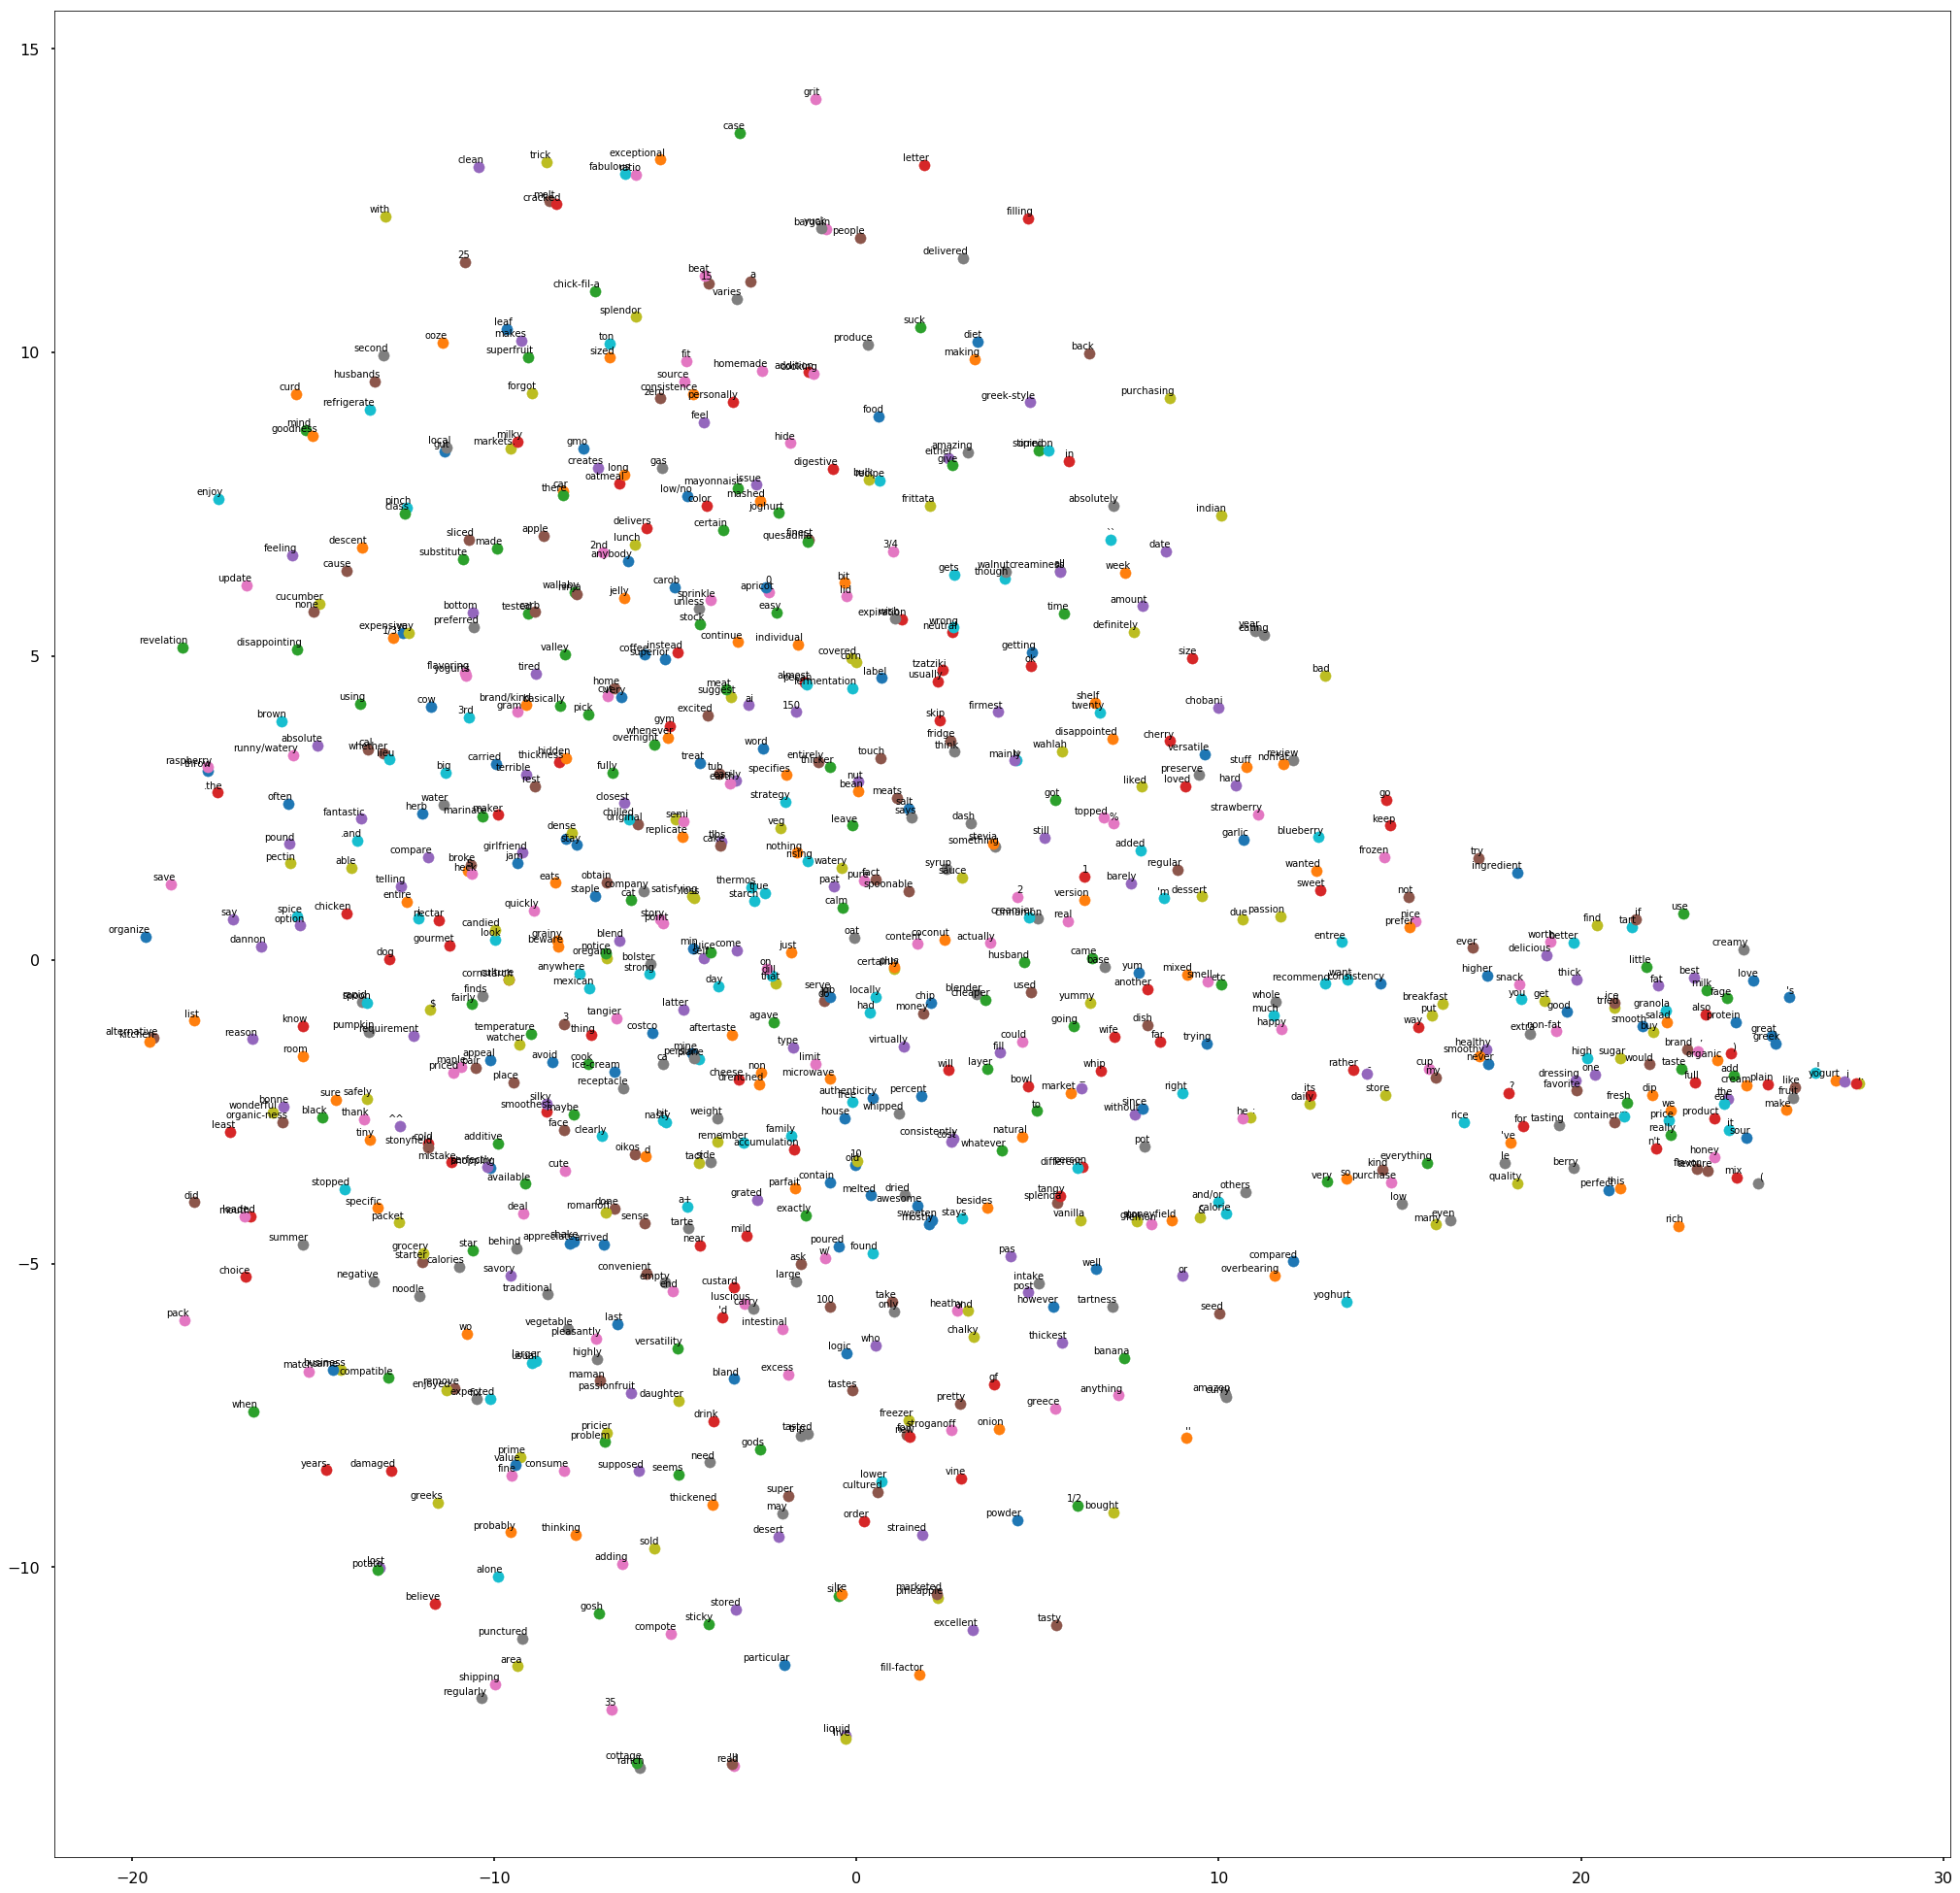

['yogurt', 'flavor', 'make', 'this', 'good', 'chocolate', 'one', 'tried']
['yogurt', 'flavor', 'make', 'this', 'good', 'sugar', 'one', 'greek']
['yogurt', 'make', 'one', 'sugar', 'this', 'love', 'flavor', 'fruit']
['yogurt', 'this', 'make', 'flavor', 'good', 'sugar', 'chocolate', 'taste']
['yogurt', 'good', 'make', 'flavor', 'one', 'chocolate', 'this', 'tried']
['flavor', 'yogurt', 'this', 'make', 'taste', 'sugar', 'honey', 'good']
['make', 'sugar', 'tried', 'yogurt', 'good', 'flavor', 'taste', 'greek']
['yogurt', 'this', 'coconut', 'taste', 'amazon', 'tried', 'snack', 'protein']
['yogurt', 'make', 'sugar', 'greek', 'one', 'good', 'protein', 'this']




['yogurt', 'fruit', 'mix', 'cream', 'plain', 'greek', 'make', 'sour']
['yogurt', 'fruit', 'flavor', 'great', 'greek', 'cream', 'make', 'add']
['yogurt', 'fruit', 'greek', 'make', 'sour', 'love', 'cream', 'really']
['yogurt', 'fruit', 'love', 'add', 'make', 'organic', 'cream', 'plain']
['yogurt', 'cream', 'fruit', 'make', 'plain', 'greek

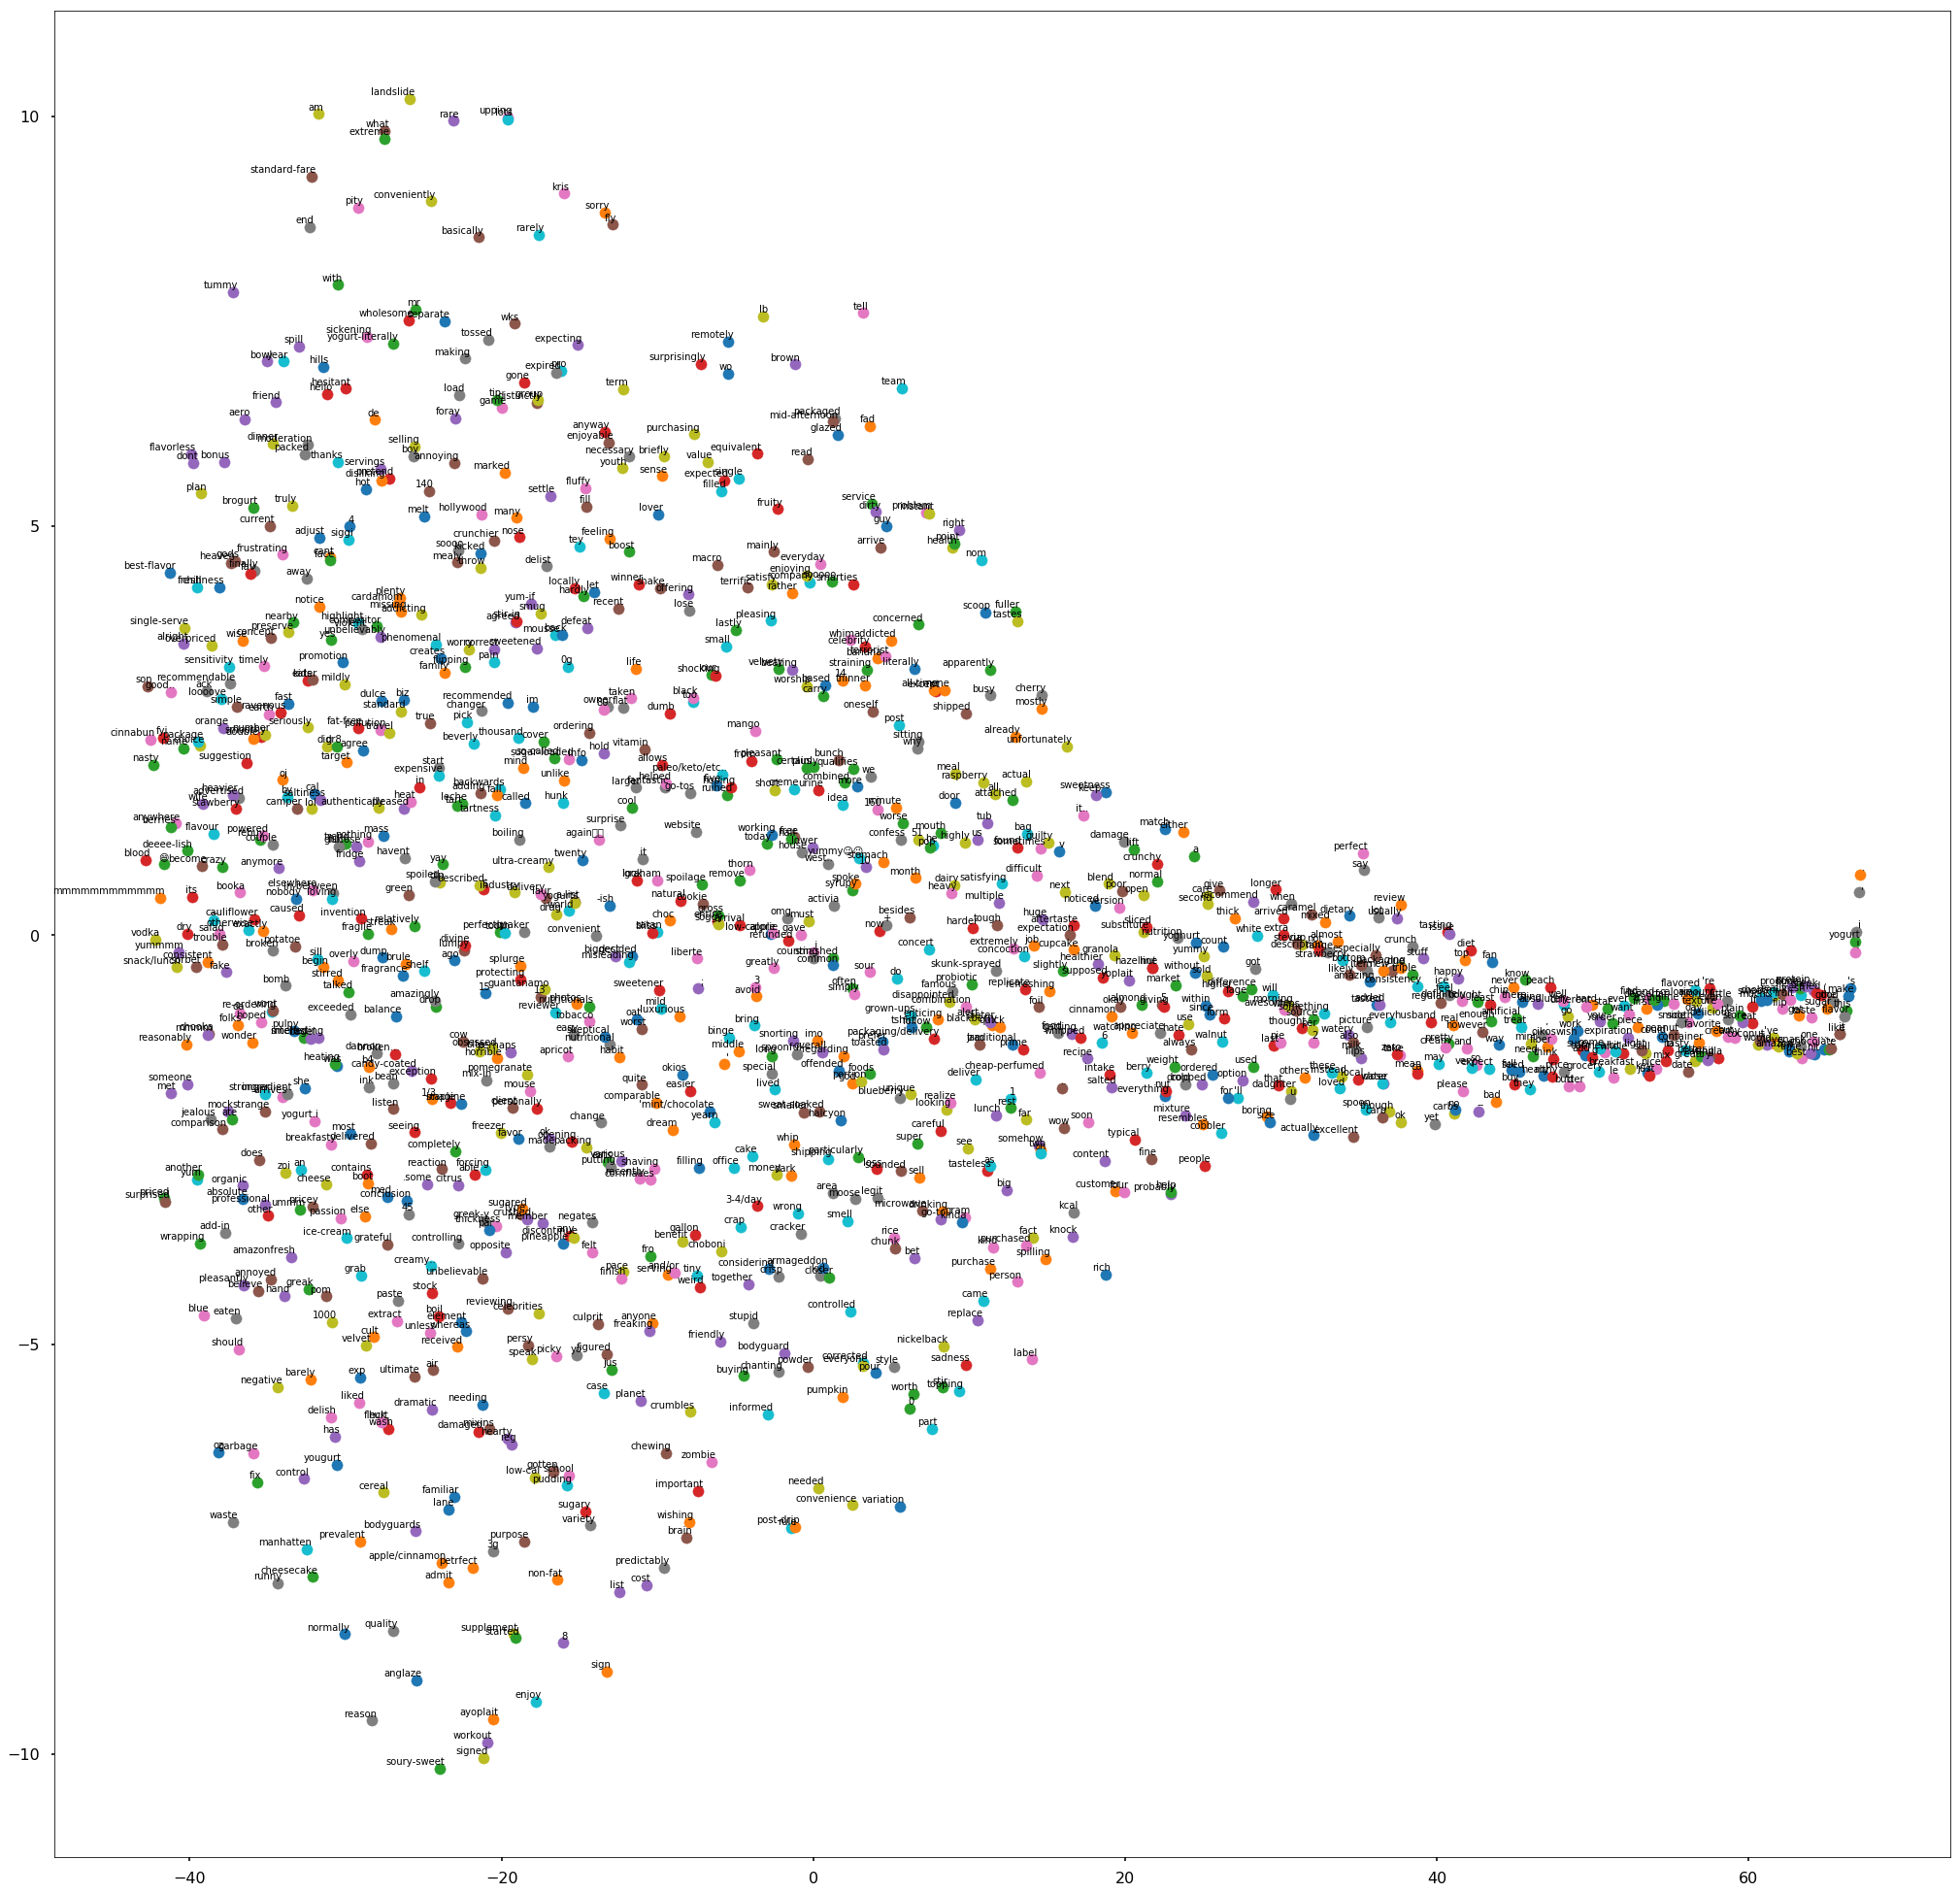

['yogurt', 'taste', 'love', 'best', 'vanilla', 'flavor', 'greek', 'whole']
['yogurt', 'taste', 'milk', 'get', 'texture', 'greek', 'one', 'amazon']
['yogurt', 'taste', 'love', 'one', 'milk', 'vanilla', 'product', 'kid']
['taste', 'yogurt', 'vanilla', 'fresh', 'greek', 'much', 'love', 'brand']
['yogurt', 'taste', 'vanilla', 'get', 'whole', 'one', 'flavor', 'milk']
['taste', 'yogurt', 'thick', 'vanilla', 'milk', 'brand', 'texture', 'much']
['sugar', 'taste', 'little', 'strawberry', 'creamy', 'yogurt', 'greek', 'milk']
['bland', 'girl', 'c', 'average', 'strong', 'yumm', 'bomb', 'overboard']




['girl', 'average', 'c', 'bland', 'strong', 'yumm', 'wow', 'shipped']
['girl', 'c', 'average', 'bland', 'strong', 'yumm', 'bomb', 'wow']
['girl', 'average', 'c', 'strong', 'bland', 'yumm', 'bomb', 'wow']
['girl', 'c', 'bland', 'average', 'yumm', 'strong', 'overboard', 'wow']
['girl', 'bland', 'c', 'average', 'yumm', 'strong', 'shipped', 'bomb']
['girl', 'average', 'c', 'bland', 'yumm', 'strong', 'bo

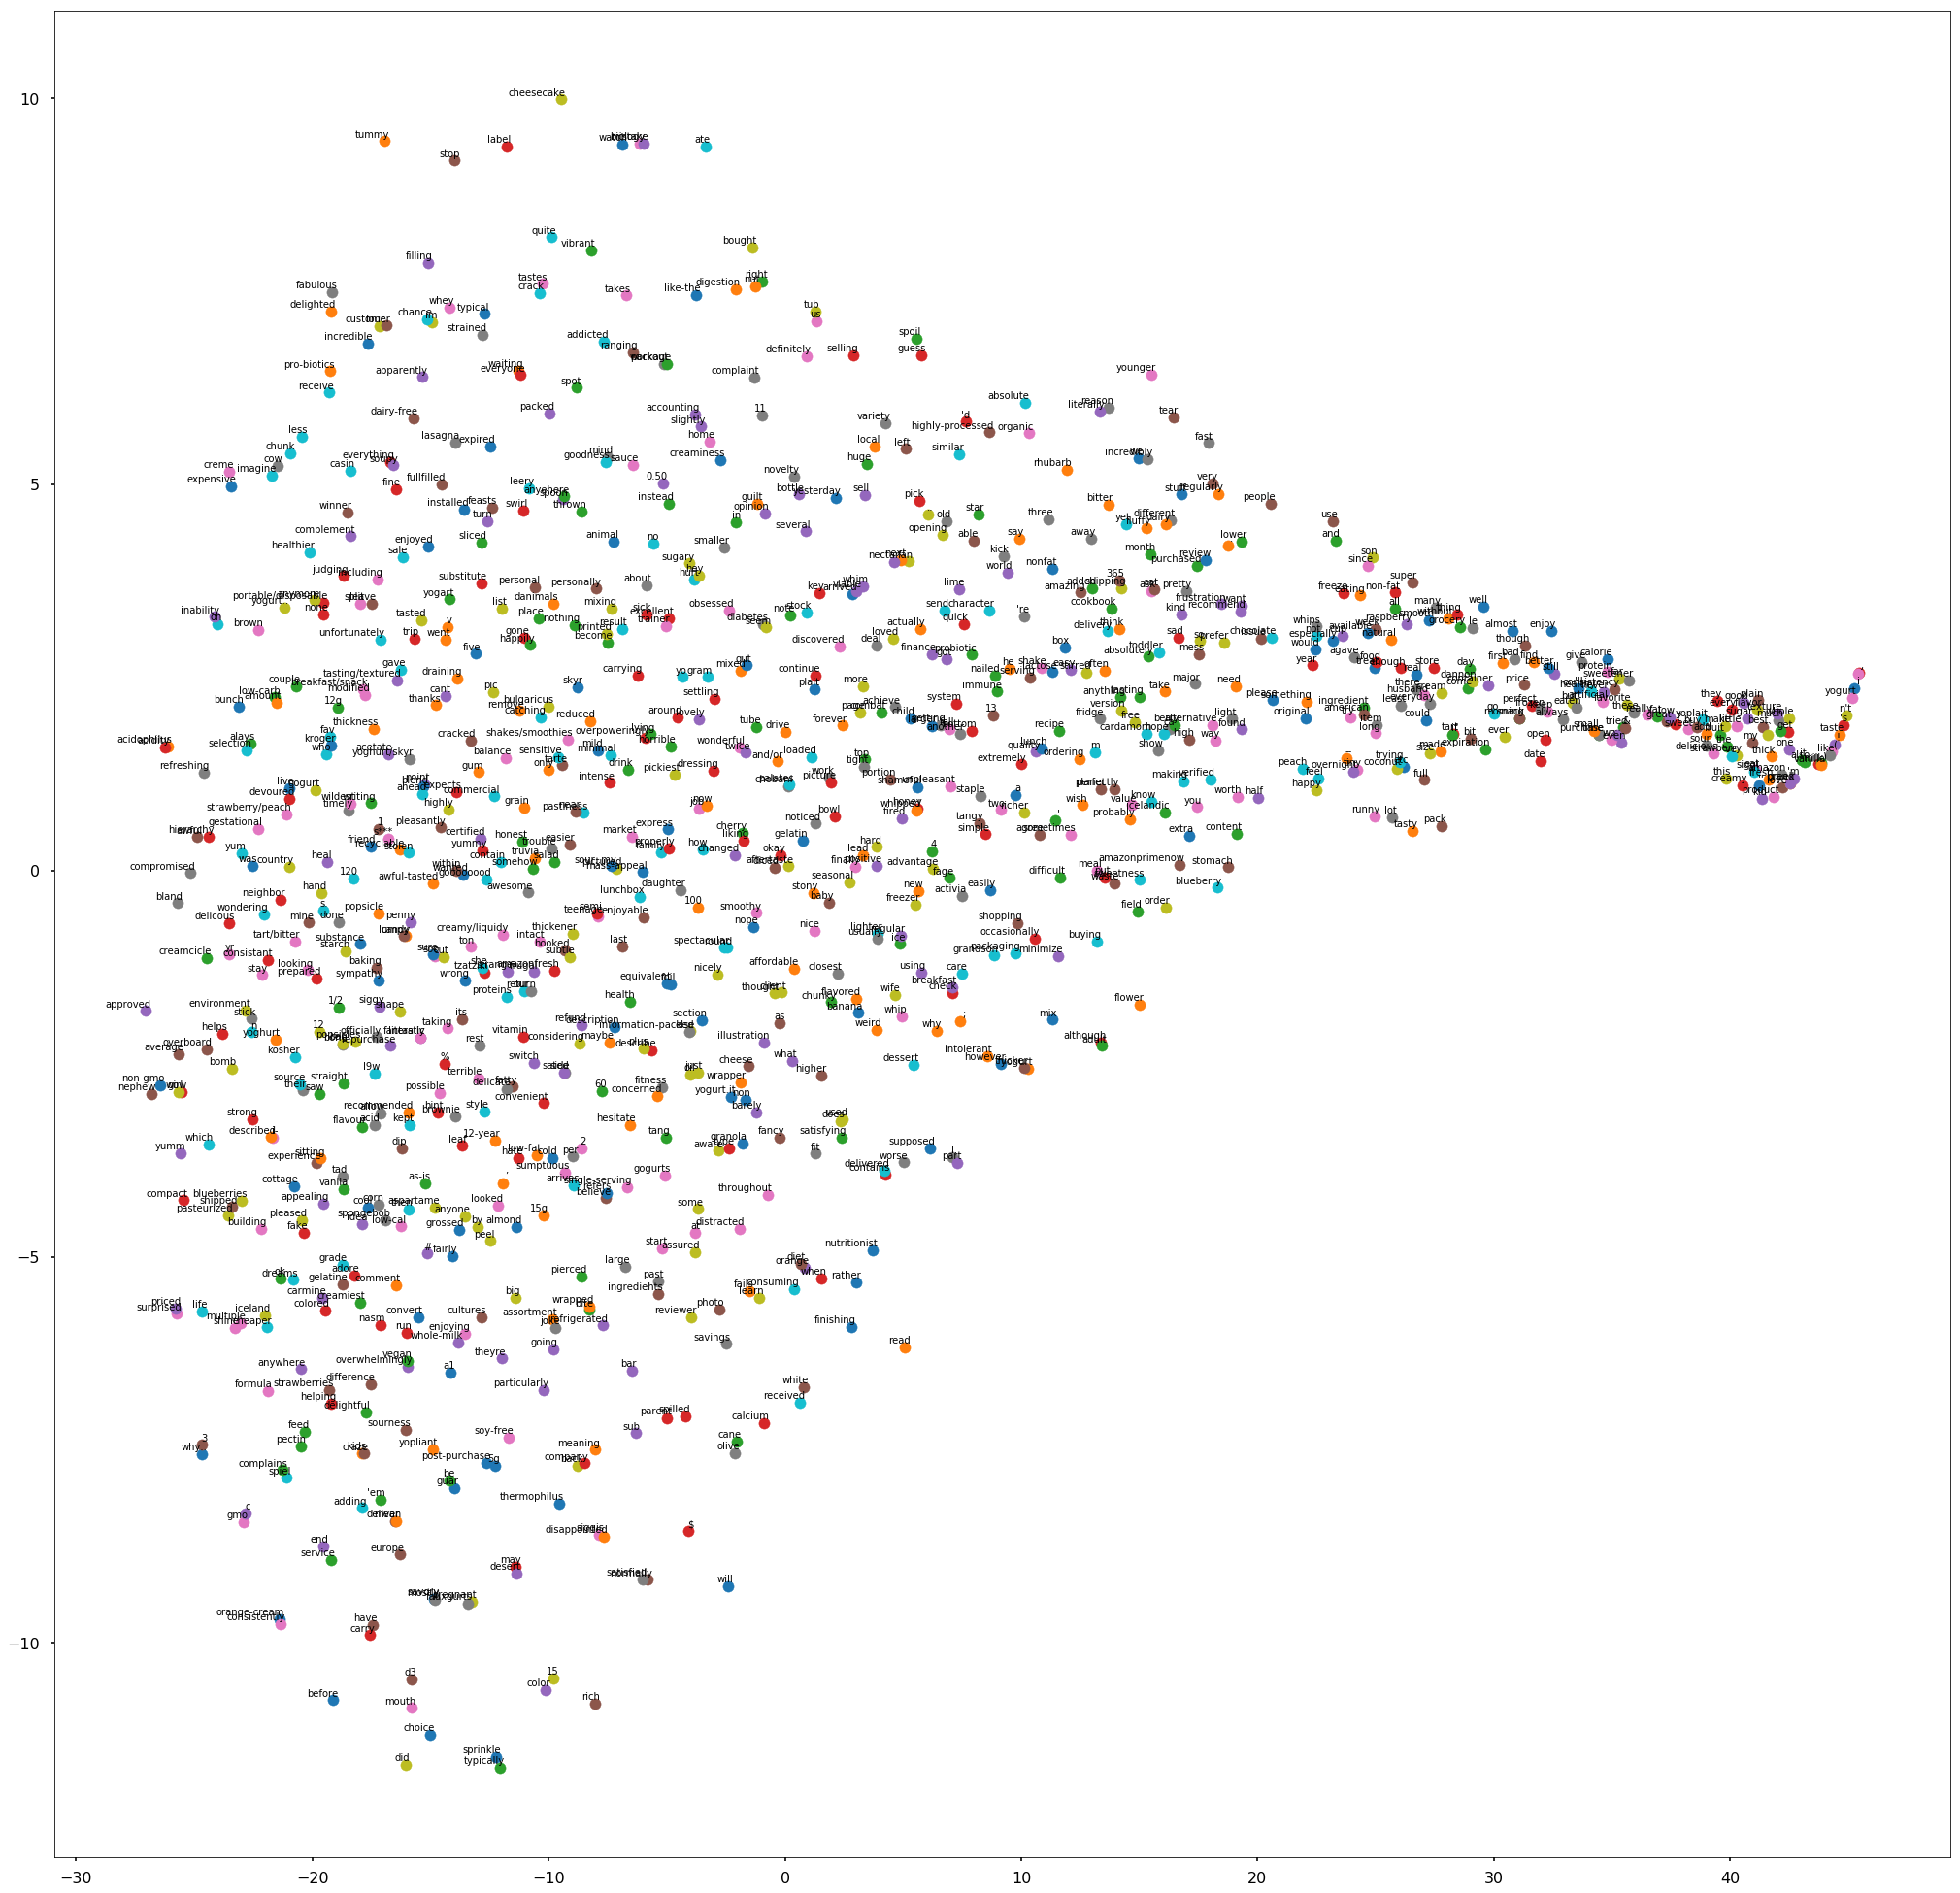

In [264]:
# print(model_dict['Plain Greek'].wv.vocab)

stopwords = ['’','also','.and','a+','It','it','like','I','i',',','.','n\'t','...','!','the','The','\'','\'s','?','\'ve','&','\'\'','(',')','^^','_','-','``','\'m']
w1 = []
w2 = []
w3 = []
w4 = []
w5 = []
w6 = []
w7 = []
w8 = []
w9 = []
w10 = []
w11 = []
w12 = []
w13 = []

n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []


q1 = []
q2 = []
q3 = []
q4 = []
q5 = []
q6 = []
q7 = []
q8 = []
q9 = []

e1 = []
e2 = []
e3 = []
e4 = []
e5 = []
e6 = []
e7 = []


r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
r6 = []
r7 = []
r8 = []

t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
t6 = []
t7 = []

for key in model_dict:
    
    if key == 'Plain Greek':
        for wd, score in model_dict[key].wv.most_similar('honey',topn=20):
            if wd not in stopwords:
                w1.append(wd)
        print(w1[:8])
        for wd, score in model_dict[key].wv.most_similar('texture',topn=20):
            if wd not in stopwords:
                w2.append(wd)
        print(w2[:8])
        for wd, score in model_dict[key].wv.most_similar('protein',topn=20):
            if wd not in stopwords:
                w3.append(wd)
        print(w3[:8])
        for wd, score in model_dict[key].wv.most_similar('creamy',topn=20):
            if wd not in stopwords:
                w4.append(wd)
        print(w4[:8])
        for wd, score in model_dict[key].wv.most_similar('sugar',topn=20):
            if wd not in stopwords:
                w5.append(wd)
        print(w5[:8])
        for wd, score in model_dict[key].wv.most_similar('organic',topn=20):
            if wd not in stopwords:
                w6.append(wd)
        print(w6[:8])
        for wd, score in model_dict[key].wv.most_similar('greek',topn=20):
            if wd not in stopwords:
                w7.append(wd)
        print(w7[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['love'],topn=20):
            if wd not in stopwords:
                w8.append(wd)
        print(w8[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['dressing'],topn=20):
            if wd not in stopwords:
                w9.append(wd)
        print(w9[:8])
#         for wd, score in model_dict[key].wv.most_similar(negative=['fun'],topn=20):
#             if wd not in stopwords:
#                 w10.append(wd)
#         print(w10[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['happy'],topn=20):
            if wd not in stopwords:
                w11.append(wd)
        print(w11[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['make'],topn=20):
            if wd not in stopwords:
                w12.append(wd)
        print(w12[:8])
#         for wd, score in model_dict[key].wv.most_similar(negative=['create'],topn=20):
#             if wd not in stopwords:
#                 w13.append(wd)
#         print(w13[:8])
        
        print()
        print()
        print()
        print()
        
        for wd, score in model_dict[key].wv.most_similar(negative=['honey'],topn=20):
            if wd not in stopwords:
                n1.append(wd)
        print(n1[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['texture'],topn=20):
            if wd not in stopwords:
                n2.append(wd)
        print(n2[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['protein'],topn=20):
            if wd not in stopwords:
                n3.append(wd)
        print(n3[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['creamy'],topn=20):
            if wd not in stopwords:
                n4.append(wd)
        print(n4[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['sugar'],topn=20):
            if wd not in stopwords:
                n5.append(wd)
        print(n5[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['organic'],topn=20):
            if wd not in stopwords:
                n6.append(wd)
        print(n6[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['greek'],topn=20):
            if wd not in stopwords:
                n7.append(wd)
        print(n7[:8])
        
        print()
        print()
        print()
        print()
        
    elif key == 'Flavored Greek':
        for wd, score in model_dict[key].wv.most_similar('greek',topn=20):
            if wd not in stopwords:
                q1.append(wd)
        print(q1[:8])
        for wd, score in model_dict[key].wv.most_similar('chocolate',topn=20):
            if wd not in stopwords:
                q2.append(wd)
        print(q2[:8])
        for wd, score in model_dict[key].wv.most_similar('creamy',topn=20):
            if wd not in stopwords:
                q3.append(wd)
        print(q3[:8])
        for wd, score in model_dict[key].wv.most_similar('protein',topn=20):
            if wd not in stopwords:
                q4.append(wd)
        print(q4[:8])
        for wd, score in model_dict[key].wv.most_similar('sugar',topn=20):
            if wd not in stopwords:
                q5.append(wd)
        print(q5[:8])
        for wd, score in model_dict[key].wv.most_similar('texture',topn=20):
            if wd not in stopwords:
                q6.append(wd)
        print(q6[:8])
        for wd, score in model_dict[key].wv.most_similar('tasty',topn=20):
            if wd not in stopwords:
                q7.append(wd)
        print(q7[:8])
        for wd, score in model_dict[key].wv.most_similar('thought',topn=20):
            if wd not in stopwords:
                q8.append(wd)
        print(q8[:8])
        for wd, score in model_dict[key].wv.most_similar('vanilla',topn=20):
            if wd not in stopwords:
                q9.append(wd)
        print(q9[:8])
        
        print()
        print()
        print()
        print()
        
        for wd, score in model_dict[key].wv.most_similar(negative=['greek'],topn=20):
            if wd not in stopwords:
                w1.append(wd)
        print(w1[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['chocolate'],topn=20):
            if wd not in stopwords:
                w2.append(wd)
        print(w2[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['protein'],topn=20):
            if wd not in stopwords:
                w3.append(wd)
        print(w3[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['creamy'],topn=20):
            if wd not in stopwords:
                w4.append(wd)
        print(w4[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['sugar'],topn=20):
            if wd not in stopwords:
                w5.append(wd)
        print(w5[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['texture'],topn=20):
            if wd not in stopwords:
                w6.append(wd)
        print(w6[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['tasty'],topn=20):
            if wd not in stopwords:
                w7.append(wd)
        print(w7[:8])
        
        
    elif key == 'Non Greek':
        for wd, score in model_dict[key].wv.most_similar('consistency',topn=20):
            if wd not in stopwords:
                r1.append(wd)
        print(r1[:8])
        for wd, score in model_dict[key].wv.most_similar('flavor',topn=20):
            if wd not in stopwords:
                r2.append(wd)
        print(r2[:8])
        for wd, score in model_dict[key].wv.most_similar('creamy',topn=20):
            if wd not in stopwords:
                r3.append(wd)
        print(r3[:8])
        for wd, score in model_dict[key].wv.most_similar('protein',topn=20):
            if wd not in stopwords:
                r4.append(wd)
        print(r4[:8])
        for wd, score in model_dict[key].wv.most_similar('sweet',topn=20):
            if wd not in stopwords:
                r5.append(wd)
        print(r5[:8])
        for wd, score in model_dict[key].wv.most_similar('fruit',topn=20):
            if wd not in stopwords:
                r6.append(wd)
        print(r6[:8])
        for wd, score in model_dict[key].wv.most_similar('tasty',topn=20):
            if wd not in stopwords:
                r7.append(wd)
        print(r7[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['my'],topn=20):
            if wd not in stopwords:
                r8.append(wd)
        print(r8[:8])
        
        print()
        print()
        print()
        print()
        
        for wd, score in model_dict[key].wv.most_similar(negative=['consistency'],topn=20):
            if wd not in stopwords:
                t1.append(wd)
        print(t1[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['flavor'],topn=20):
            if wd not in stopwords:
                t2.append(wd)
        print(t2[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['protein'],topn=20):
            if wd not in stopwords:
                t3.append(wd)
        print(t3[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['creamy'],topn=20):
            if wd not in stopwords:
                t4.append(wd)
        print(t4[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['sweet'],topn=20):
            if wd not in stopwords:
                t5.append(wd)
        print(t5[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['fruit'],topn=20):
            if wd not in stopwords:
                t6.append(wd)
        print(t6[:8])
        for wd, score in model_dict[key].wv.most_similar(negative=['tasty'],topn=20):
            if wd not in stopwords:
                t7.append(wd)
        print(t7[:8])
        
#         print(model_dict[key].wv.most_similar('sugar')[:8])
#         print(model_dict[key].wv.most_similar('texture')[:8])
#         print(model_dict[key].wv.most_similar('protein')[:8])
#         print(model_dict[key].wv.most_similar('creamy')[:8])
        
#         print(model_dict[key].wv.most_similar(negative=['honey'])[:8])
#         print(model_dict[key].wv.most_similar(negative=['sugar'])[:8])
#         print(model_dict[key].wv.most_similar(negative=['texture'])[:8])
#         print(model_dict[key].wv.most_similar(negative=['protein'])[:8])
#         print(model_dict[key].wv.most_similar(negative=['creamy'])[:8])
    tsne_plot(model_dict[key], key)

In [272]:
from sklearn import cluster
from sklearn import metrics

for key in model_dict:
    model = model_dict[key]
    X = model[model.wv.vocab]

    from nltk.cluster import KMeansClusterer
    import nltk
    NUM_CLUSTERS=4
    kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
    print(key)
#     print (assigned_clusters)

    words = list(model.wv.vocab)
    for i, word in enumerate(words):  
        print (word + ":" + str(assigned_clusters[i]))
    
    kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    print ("Cluster id labels for inputted data")
    print (labels)
    print ("Centroids data")
    print (centroids)

    print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
    print (kmeans.score(X))

    silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

    print ("Silhouette_score: ")
    print (silhouette_score)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Plain Greek
love:3
yogurt:3
came:3
damaged:1
--:3
foil:3
lid:1
punctured:3
.:3
a+:1
greek:3
we:3
use:3
product:3
type:3
zero:2
point:0
weight:2
watcher:2
it:3
's:3
nothing:3
add:3
,:3
i:3
like:3
story:1
behind:0
business:0
strategy:0
sour:3
cream:3
substitute:2
also:3
excellent:2
starter:2
homemade:3
summer:0
quality:3
expected:0
good:3
this:3
fresh:3
cold:3
delicious:3
would:3
purchase:3
company:3
&:3
!:3
great:3
stuff:3
stirred:3
bowl:2
liquid:0
splenda:1
cut:2
tartness:3
wahlah:3
...:3
smooth:3
rich:3
silk:2
whip:3
the:3
texture:3
grit:3
others:3
tried:3
'm:3
trying:3
replicate:1
chick-fil-a:1
far:2
best:3
brand:3
match:0
all:3
greeks:2
tart:3
perfect:3
thinking:1
maybe:3
1:3
tlbs:1
regular:3
cup:3
dash:3
vanilla:3
pinch:2
salt:2
make:3
taste:3
will:3
come:2
back:3
update:2
review:3
find:3
right:3
consistency:3
5:0
star:3
way:3
chobani:3
ever:3
worth:3
extra:3
$:1
look:3
ingredient:3
just:2
milk:3
culture:1
healthy:3
tasty:3
nice:3
whole:3
certainly:2
price:3
compared:3
organic:3
wa

Flavored Greek
my:3
favorite:3
yogurt:3
entire:3
planet:3
the:3
best:3
i:3
've:3
ever:3
tasted:3
.:3
this:3
eat:3
you:3
like:3
creamy:3
,:3
mildly:2
sweet:3
n't:3
mind:3
fat:3
(:3
):3
it:3
one:3
reason:3
signed:3
fresh:3
since:3
hard:3
find:3
local:3
store:3
wow:3
!:3
flavor:3
did:1
expect:3
could:3
get:3
enough:3
husband:3
agreed:3
unbelievable:3
so:3
delicious:3
texture:3
tartness:3
sweetness:3
...:3
honey:3
vanilla:3
somehow:3
distinctly:3
taste:3
good:3
daughter:3
loved:3
she:3
mostly:3
used:3
smoothy:3
greek:3
gods:2
anywhere:0
kid:3
love:3
enjoy:3
normally:3
avoid:3
completely:3
fat-free:2
expecting:3
worst:3
nice:3
surprise:3
great:3
consistency:3
element:3
missing:3
soury-sweet:3
fruity:3
--:3
excellent:3
breakfasty:3
snack:3
chobani:3
-:3
's:3
imo:3
market:3
buy:3
product:3
really:3
liked:3
price:3
ok:3
thanks:3
amazon:3
first:3
order:3
hesitant:3
expiration:3
date:3
2:3
u:3
go:3
grocery:3
fast:3
month:3
today:3
'm:3
pleased:3
fine:3
le:3
runny:1
vodka:1
nom:3
low:3
calorie:3


god:3
qualifies:3
equivalent:3
beating:3
oneself:3
thorn:3
chanting:3
worship:3
satan:3
kicked:3
cult:3
extreme:3
sugary:3
us:3
quite:3
.i:3
dannon:3
industry:3
crap:3
remotely:3
fad:3
rest:3
important:3
biggest:3
culprit:3
garbage:2
waste:2
money:3
phenomenal:3
15:3
14:3
0:3
loss:3
friendly:3
believe:3
yogurt.i:3
finally:2
standard:3
on:3
par:3
family:3
remove:3
packaging/delivery:3
multiple:3
foil:3
heavy:3
sitting:3
alert:3
team:3
common:3
sense:3
nasty:0
fav:2
.some:3
wont:2
recently:3
putting:3
enjoying:3
yummy😉😉:3
more:3
enticing:3
velvety:3
hazelnut:3
go-to:3
ordering:3
again👍🏽:3
moose:3
unique:3
topping:3
variation:3
choc:3
gross:3
in:3
freaking:3
mainly:3
sour:3
legit:3
mint:3
mild:3
-ish:3
middle:3
pop:3
bliss:3
crushed:3
cookie:3
rice:3
crisp:3
portion:3
controlled:3
size:3
rather:3
half:3
gallon:3
friend:1
figured:3
whim:3
.it:3
short:3
lived:3
'mint/chocolate:3
':3
closer:3
replicate:3
knock:3
tough:3
low-calorie:3
negates:3
benefit:3
cobbler:3
pour:3
spilling:3
point:3
ca

Non Greek
i:3
think:3
ok:1
,:3
kid:3
love:3
.:3
there:3
flavor:3
yoplait:3
enjoy:3
eating:3
all:3
yummy:3
!:3
great:3
product:3
fast:3
shipping:3
delivery:3
well:3
tasty:3
it:3
's:3
good:3
my:3
yogurt:3
their:1
favorite:3
blueberry:3
original:3
low-fat:3
and:3
quick:3
point:2
difference:1
try:3
give:3
blueberries:2
who:3
live:3
without:3
'em:3
?:3
easy:3
pack:3
breakfast/snack:1
ca:3
n't:3
go:3
wrong:1
wish:3
come:3
portable/disposable:1
spoon:3
average:0
delicious:3
always:3
this:3
not:3
real:3
read:3
ingredient:3
label:3
literally​:3
full:3
s***:1
bad:3
pasteurized:1
grade:0
a:3
reduced:2
fat:3
milk:3
sugar:3
strawberries:2
modified:1
corn:3
starch:1
kosher:1
gelatin:3
natural:3
pectin:3
colored:1
carmine:2
cultures:3
(:3
l.:3
bulgaricus:1
s.:3
thermophilus:1
acidophilus:1
):3
vitamin:3
acetate:2
d3:2
gmo:2
pretty:3
bomb:0
yum:0
non-gmo:0
taste:3
cherry:3
creamy:3
packed:2
pleasantly:2
surprised:3
much:3
tasted:2
our:3
arrived:3
fresh:3
expiration:3
date:3
several:3
week:3
job:3
amaz

Cluster id labels for inputted data
[3 0 1 3 2 2 3 0 2 2 0 0 0 1 2 2 2 1 1 1 0 0 2 3 2 2 3 1 0 0 0 1 0 1 1 1 0
 0 1 1 1 0 1 2 1 0 1 1 3 0 1 1 0 1 1 1 2 0 2 0 0 1 0 1 1 0 1 0 1 1 1 1 2 2
 2 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 0 1 1 1 3 1 2 1 1 1 2 1 1 1
 2 0 0 1 0 1 2 1 1 0 0 2 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 2 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 2 1 1 0 0 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 0 1 0
 2 0 2 2 0 1 1 1 2 2 1 1 2 0 2 1 1 1 1 0 0 2 0 0 1 1 1 0 2 1 1 1 0 1 1 0 0
 1 1 2 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 2 1 0 2 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 0 1 0 2 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 0 1 2 1 1 1
 0 1 1 1 1 2 1 1 2 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 2 0 2 1 1
 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 2 1 1 1 1 1 0 0 1 1 0 1
 1 2 2 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0